# Xedocs user guide

The purpose of this document it to show the reader how to use some of the basic function in xedocs, these will include:
- getting corrections by run_id or date (single value corrections)
- Next we will load the PMT gains showing how to get multivalue corrections

In [1]:
import strax
import straxen
import xedocs as xd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

With xedocs we can use schemas to get different corrections from multiple sources such as bodega, fax_configuration, or directly access some corrections such as the electron lifetime or the pmt gains

In [4]:
#Schemas are the different data storages under xedocs, you are free to define your own schemas! 
#examples of making your own schemas will be in a later notebook
xd.list_schemas()

['bodega',
 'fax_configs',
 'electron_drift_velocities',
 'electron_drift_time_gates',
 'electron_lifetimes',
 'rel_extraction_effs',
 'fdc_maps',
 'hit_thresholds',
 'pmt_gains',
 'posrec_models',
 's1_xyz_maps',
 's2_xy_maps',
 'utube_calibrations',
 'diffused_calibrations',
 'ibelt_calibrations']

### Loading single value data

Lets try loding the drift velocity from bodega using a spedific time coordinate! Then we will load the same data by run_id

In [6]:
drift_velocty_by_time = xd.Bodega.find_one(field = 'drift_velocity', version = 'v1', time = '2020-08-03T10:06:00')

In [7]:
drift_velocty_by_time.value

0.0677

In [8]:
drift_velocty_by_run = xd.Bodega.find_one(field = 'drift_velocity', version = 'v1', run_id = '8901')

In [9]:
drift_velocty_by_run.value

0.0677

As you can see all you have to do is change the time field for the run_id

### PMT gains

Now we will load data on PMT gains and show how we can do this with xedocs:
- We will first load a single pmt, both as an array and as a data frame
- Next we will load multiple PMTs 
- We will show how to navigate xedocs dataframes by index
- Finally we will load the PMT average gain

In [10]:
# the data is not filtered by any spesific field by default but you can sort it any way you want
pmt_0 = xd.find('pmt_gains', version = 'v6', pmt = 0, detector = 'tpc', _sort='time')
# _sort='time' can be given to any find function to sort by a certain orfer
# _sort={'time':-1} can be given to sort data in decending order
pmt_0_val = [pmt.value for pmt in pmt_0] #store all the values in a pmt array

In [11]:
pmt_0[:5]

[PmtGain(version='v6', created_date=datetime.datetime(2022, 5, 1, 18, 24, 58, 872000), comments='migrated from cmt.', time=datetime.datetime(2020, 4, 1, 12, 6, 54), detector='tpc', pmt=0, value=0.0550598626),
 PmtGain(version='v6', created_date=datetime.datetime(2022, 5, 1, 18, 24, 58, 872000), comments='migrated from cmt.', time=datetime.datetime(2020, 4, 1, 14, 17, 27), detector='tpc', pmt=0, value=0.0550598626),
 PmtGain(version='v6', created_date=datetime.datetime(2022, 5, 1, 18, 24, 58, 872000), comments='migrated from cmt.', time=datetime.datetime(2020, 4, 1, 14, 17, 28), detector='tpc', pmt=0, value=0.0066235962),
 PmtGain(version='v6', created_date=datetime.datetime(2022, 5, 1, 18, 24, 58, 872000), comments='migrated from cmt.', time=datetime.datetime(2020, 4, 16, 9, 49, 17), detector='tpc', pmt=0, value=0.0066235962),
 PmtGain(version='v6', created_date=datetime.datetime(2022, 5, 1, 18, 24, 58, 872000), comments='migrated from cmt.', time=datetime.datetime(2020, 4, 16, 9, 49, 

In [12]:
pmt_0_df = xd.find_df('pmt_gains', version = 'v6', pmt = 0, detector = 'tpc', _sort='time')

In [13]:
pmt_0_df

created_date  \
version time                    detector pmt                           
v6      2020-04-01 12:06:54.000 tpc      0   2022-05-01 18:24:58.872   
        2020-04-01 14:17:27.000 tpc      0   2022-05-01 18:24:58.872   
        2020-04-01 14:17:28.000 tpc      0   2022-05-01 18:24:58.872   
        2020-04-16 09:49:17.000 tpc      0   2022-05-01 18:24:58.872   
        2020-04-16 09:49:18.000 tpc      0   2022-05-01 18:24:58.872   
...                                                              ...   
        2021-12-09 16:11:19.000 tpc      0   2022-05-01 18:24:58.872   
        2021-12-10 13:17:45.785 tpc      0   2022-05-01 18:24:58.872   
        2021-12-17 10:13:10.000 tpc      0   2022-05-01 18:24:58.872   
        2021-12-17 17:53:21.302 tpc      0   2022-05-01 18:24:58.872   
        2021-12-24 08:19:40.000 tpc      0   2022-05-01 18:24:58.872   

                                                        comments     value  
version time                    detector pmt                                
v6      2020-04-01 12:06:54.000 tpc      0    migrated from cmt.  0.055060  
        2020-04-01 14:17:27.000 tpc      0    migrated from cmt.  0.055060  
        2020-04-01 14:17:28.000 tpc      0    migrated from cmt.  0.006624  
        2020-04-16 09:49:17.000 tpc      0    migrated from cmt.  0.006624  
        2020-04-16 09:49:18.000 tpc      0    migrated from cmt.  0.055060  
...                                                          ...       ...  
        2021-12-09 16:11:19.000 tpc      0    migrated from cmt.  0.007945  
        2021-12-10 13:17:45.785 tpc      0    migrated from cmt.  0.007945  
        2021-12-17 10:13:10.000 tpc      0    migrated from cmt.  0.007947  
        2021-12-17 17:53:21.302 tpc      0    migrated from cmt.  0.007947  
        2021-12-24 08:19:40.000 tpc      0    migrated from cmt.  0.007951  

[302 rows x 3 columns]

To get multiple pmts all you have to do is change the pmt value to an array with the desired pmts

In [22]:
pmt_multi = xd.find('pmt_gains', version = 'v6', pmt = [0, 5, 7], detector = 'tpc', sort = 'time')

In [23]:
pmt_multi_df = xd.find_df('pmt_gains', version = 'v6', pmt = [0, 5, 7], detector = 'tpc', sort = 'time')

In [24]:
pmt_multi_df

created_date  \
version time                    detector pmt                           
v6      2020-04-01 12:06:54.000 tpc      0   2022-05-01 18:24:58.872   
                                         5   2022-05-01 18:25:05.278   
                                         7   2022-05-01 18:25:07.779   
        2020-04-01 14:17:27.000 tpc      0   2022-05-01 18:24:58.872   
                                         5   2022-05-01 18:25:05.278   
...                                                              ...   
        2021-12-17 17:53:21.890 tpc      5   2022-05-01 18:25:05.278   
        2021-12-17 17:53:21.998 tpc      7   2022-05-01 18:25:07.779   
        2021-12-24 08:19:40.000 tpc      0   2022-05-01 18:24:58.872   
                                         5   2022-05-01 18:25:05.278   
                                         7   2022-05-01 18:25:07.779   

                                                        comments     value  
version time                    detector pmt                                
v6      2020-04-01 12:06:54.000 tpc      0    migrated from cmt.  0.055060  
                                         5    migrated from cmt.  0.227363  
                                         7    migrated from cmt.  0.058412  
        2020-04-01 14:17:27.000 tpc      0    migrated from cmt.  0.055060  
                                         5    migrated from cmt.  0.227363  
...                                                          ...       ...  
        2021-12-17 17:53:21.890 tpc      5    migrated from cmt.  0.009499  
        2021-12-17 17:53:21.998 tpc      7    migrated from cmt.  0.007816  
        2021-12-24 08:19:40.000 tpc      0    migrated from cmt.  0.007951  
                                         5    migrated from cmt.  0.009484  
                                         7    migrated from cmt.  0.007820  

[897 rows x 3 columns]

If you are like me (a.k.a. not a coding expert at all) you might be confused as to how to access the different indecies in a dataframe that has so many, where a number of them are of a different size, the following code is how I figures out how to do it although there might be better methods out there

In [38]:
pmt_multi_df.groupby(level=0).apply(lambda x: x.iloc[0]).index

Index(['v6'], dtype='object', name='version')

In [37]:
pmt_multi_df.groupby(level=1).apply(lambda x: x.iloc[0]).index

DatetimeIndex([       '2020-04-01 12:06:54',        '2020-04-01 14:17:27',
                      '2020-04-01 14:17:28',        '2020-04-16 09:49:17',
                      '2020-04-16 09:49:18',        '2020-04-17 13:46:50',
                      '2020-04-17 13:46:51',        '2020-04-28 14:27:49',
                      '2020-04-28 14:27:50',        '2020-05-08 13:15:49',
               ...
               '2021-12-06 19:10:22.964000',        '2021-12-09 16:11:19',
               '2021-12-10 13:17:45.785000', '2021-12-10 13:17:46.420000',
               '2021-12-10 13:17:46.531000',        '2021-12-17 10:13:10',
               '2021-12-17 17:53:21.302000', '2021-12-17 17:53:21.890000',
               '2021-12-17 17:53:21.998000',        '2021-12-24 08:19:40'],
              dtype='datetime64[ns]', name='time', length=447, freq=None)

In [46]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[0]).index

Int64Index([0, 5, 7], dtype='int64', name='pmt')

In [51]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[1]).index

Int64Index([0, 5, 7], dtype='int64', name='pmt')

In [42]:
df_check = lambda x: x.iloc[0]

In [43]:
df_check(pmt_multi_df)

created_date    2022-05-01 18:24:58.872000
comments                migrated from cmt.
value                              0.05506
Name: (v6, 2020-04-01 12:06:54, tpc, 0), dtype: object

As you can see in these function the level indicates which of the indecies you want to look at. The lambda is a python function that can take any number of arguments but can only have 1 experssion. Lambda here takes the values on the location, so if we omit the ,index part the full line will give you what is stored not just the index

In [40]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[0])

,created_date,comments,value
pmt,,,
0,2022-05-01 18:24:58.872,migrated from cmt.,0.055060
5,2022-05-01 18:25:05.278,migrated from cmt.,0.227363
7,2022-05-01 18:25:07.779,migrated from cmt.,0.058412


In [66]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[0]).shape

(3, 3)

In [68]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[0])['value'].loc[5]

0.2273628417

In [55]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[1])

,created_date,comments,value
pmt,,,
0,2022-05-01 18:24:58.872,migrated from cmt.,0.055060
5,2022-05-01 18:25:05.278,migrated from cmt.,0.227363
7,2022-05-01 18:25:07.779,migrated from cmt.,0.058412


Here we will take all pmts at a spesific point in time and plot their values at a spesific point in time

In [77]:
pmt_gain_model = xd.find('pmt_gains', version = 'v6', detector = 'tpc', time = '2020-08-03T10:06:00')

In [78]:
pmt_gain_model_values = [pmt_gains.value for pmt_gains in pmt_gain_model] 

In [68]:
pmt_gain_model_values[:10]

[0.002072156,
 0.002853777,
 0.0041144497,
 0.0047589021,
 0.0021369285,
 0.0096745111,
 0.0018689753,
 0.0021306124,
 0.0025353129,
 0.0021855045]

(-3, 517.6518366747126)

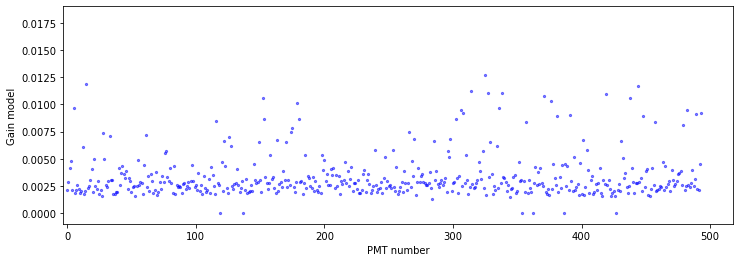

In [66]:
fig = plt.figure(figsize=(12,4))
plt.scatter(np.arange(len(pmt_gain_model_values)),pmt_gain_model_values,
           color = 'blue', marker = '.', s = 20, alpha = 0.5, label = 'CMT')
plt.xlabel("PMT number")
plt.ylabel('Gain model')
plt.ylim(-0.001)
plt.xlim(-3)

Since the corrections will be loaded into a python array changing the values is simple you can just overwrite the array however you want

In [82]:
pmt_gain_model_values = np.repeat(1, len(pmt_gain_model_values))

In [83]:
pmt_gain_model_values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Loading map corrections

Xedocs does not currently have any maps saved so I will save this section for later, I will try to insert a map correction myself and do this later

In [69]:
xd.list_schemas()

['bodega',
 'fax_configs',
 'electron_drift_velocities',
 'electron_drift_time_gates',
 'electron_lifetimes',
 'rel_extraction_effs',
 'fdc_maps',
 'hit_thresholds',
 'pmt_gains',
 'posrec_models',
 's1_xyz_maps',
 's2_xy_maps',
 'utube_calibrations',
 'diffused_calibrations',
 'ibelt_calibrations']